# Name: นายจุติณัฏฐ์ รัตนะมงคลกุล
# SID: 6609650228

# Load libraries

In [137]:
# Load libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
url = 'https://archive.ics.uci.edu/dataset/225/ilpd+indian+liver+patient+dataset'

#Data Acquisition

In [138]:
pip install ucimlrepo

In [139]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
ilpd_indian_liver_patient_dataset = fetch_ucirepo(id=225)

In [140]:
# Loads Dataset
data = ilpd_indian_liver_patient_dataset.data.features

In [141]:
#View Data
data

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00


In [142]:
#Show All Rows and Columns
data.shape

(583, 10)

# Data Preparation

In [143]:
# View first five rows of the dataset
data.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40


#Checking and Handling Duplicate Data

In [144]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
578,False
579,False
580,False
581,False


In [145]:
data[data.duplicated()]

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00
106,36,Male,5.3,2.3,145,32,92,5.1,2.6,1.00
108,36,Male,0.8,0.2,158,29,39,6.0,2.2,0.50
138,18,Male,0.8,0.2,282,72,140,5.5,2.5,0.80
143,30,Male,1.6,0.4,332,84,139,5.6,2.7,0.90
158,72,Male,0.7,0.1,196,20,35,5.8,2.0,0.50


In [146]:
#Check duplicated
data.duplicated().sum()

13

In [147]:
#Drop duplicated data
data_drop = data.drop_duplicates()

In [148]:
data_drop.shape

(570, 10)

583 - 13 = 570

#Checking and handling inconsistent Datatypes

In [149]:
# Find unique values in column 'Gender'
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [150]:
# Find unique values in each column
for col in data_drop.select_dtypes(include=['object']).columns:
  print(f'{col}: {data_drop[col].unique()}')

Gender: ['Female' 'Male']


In [151]:
# Find unique values in each column
for Gender in data_drop.columns:
  print(f'{Gender}: {data[Gender].unique()}')

Age: [65 62 58 72 46 26 29 17 55 57 64 74 61 25 38 33 40 51 63 34 20 84 52 30
 48 47 45 42 50 85 35 21 32 31 54 37 66 60 19 75 68 70 49 14 13 18 39 27
 36 24 28 53 15 56 44 41  7 22  8  6  4 43 23 12 69 16 78 11 73 67 10 90]
Gender: ['Female' 'Male']
TB: [ 0.7 10.9  7.3  1.   3.9  1.8  0.9  0.6  2.7  1.1  1.6  2.2  2.9  6.8
  1.9  4.1  6.2  4.   2.6  1.3 14.2  1.4  2.4 18.4  3.1  8.9  0.8  2.8
  2.   5.7  8.6  5.8  5.2  3.8  6.6  0.5  5.3  3.2  1.2 12.7 15.9 18.
 23.  22.7  1.7  3.  11.3  4.7  4.2  3.5  5.9  8.7 11.  11.5  4.5 75.
 22.8 14.1 14.8 10.6  8.   1.5  2.1  6.3  2.3 27.2  2.5  3.6 30.5 16.4
 14.5 18.5 23.2  3.7  3.3  7.1  6.7 22.6  7.5  5.   4.9  8.2  0.4  7.4
 23.3  7.9  3.4 19.8 32.6 17.7 20.  26.3  4.4  9.4 30.8 19.6 15.8  5.5
 20.2 27.7 11.1 10.2 42.8 15.2 16.6 17.3 22.5 16.7  7.7 15.6 12.1 25.
 15. ]
DB: [ 0.1  5.5  4.1  0.4  2.   0.7  0.2  0.3  1.3  0.8  0.5  1.   3.   1.9
  1.2  7.8  0.6  1.1  3.2  1.8  8.8  1.6  4.5  2.8  4.   2.7  2.4  1.5
  2.3  3.6  6.2  7.   8.2 1

There is no inconsistent values.

# Checking and handling missing data

In [152]:
# Check for missing values
data_drop.isnull()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
578,False,False,False,False,False,False,False,False,False,False
579,False,False,False,False,False,False,False,False,False,False
580,False,False,False,False,False,False,False,False,False,False
581,False,False,False,False,False,False,False,False,False,False


In [153]:
# Check number of missing values
data_drop.isnull().sum()

,0
Age,0
Gender,0
TB,0
DB,0
Alkphos,0
Sgpt,0
Sgot,0
TP,0
ALB,0
A/G Ratio,4


There is no missing data.

In [154]:
#Transform data in 'Gender' change Male and Female to 0 and 1
data_drop.loc[data['Gender'] == 'Male', 'Gender'] = 0
data_drop.loc[data['Gender'] == 'Female', 'Gender'] = 1

In [155]:
data_drop['Gender'].unique()

array([1, 0], dtype=object)

#Outliers

In [156]:
#FInd quantile
Q1 = data_drop.quantile(0.25)
Q3 = data_drop.quantile(0.75)

In [157]:
#Calculate the interquartile range
IQR = Q3 - Q1

In [158]:
#Detect Outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [159]:
#Show lower_bound data
lower_bound

,0
Age,-4.5
Gender,0.0
TB,-1.9
DB,-1.45
Alkphos,-7.0
Sgpt,-32.5
Sgot,-67.625
TP,3.7
ALB,0.8
A/G Ratio,0.1


In [160]:
#Show upper_bound data
upper_bound

,0
Age,95.5
Gender,0.0
TB,5.3
DB,2.95
Alkphos,481.0
Sgpt,115.5
Sgot,179.375
TP,9.3
ALB,5.6
A/G Ratio,1.7


#EDA and Data Visualization

In [161]:
#Sort out Data types
data_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 570 entries, 0 to 582
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        570 non-null    int64  
 1   Gender     570 non-null    object 
 2   TB         570 non-null    float64
 3   DB         570 non-null    float64
 4   Alkphos    570 non-null    int64  
 5   Sgpt       570 non-null    int64  
 6   Sgot       570 non-null    int64  
 7   TP         570 non-null    float64
 8   ALB        570 non-null    float64
 9   A/G Ratio  566 non-null    float64
dtypes: float64(5), int64(4), object(1)
memory usage: 49.0+ KB


In [162]:
# Get summary statistics of numerical variables
data_drop.describe()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
count,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,570.000000,566.000000
mean,44.849123,3.321754,1.497544,291.750877,79.728070,109.380702,6.496316,3.148947,0.948004
std,16.242182,6.267941,2.833231,245.291859,181.471697,290.880671,1.088300,0.796813,0.319635
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000
75%,58.000000,2.600000,1.300000,298.000000,60.000000,86.750000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


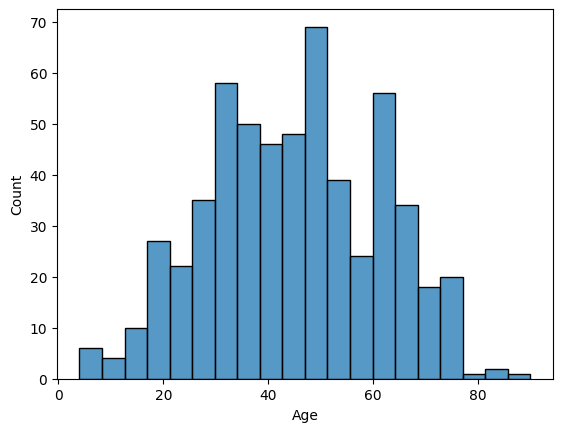

In [173]:
#ใช้ Histogram แสดงการกระจายตัว 'Age' ไปชุดข้อมูล เพื่อดูว่ากลุ่มอายุไหนมีผู้ป่วยมากที่สุด
sb.histplot(data_drop['Age'], bins=20)
plt.show()

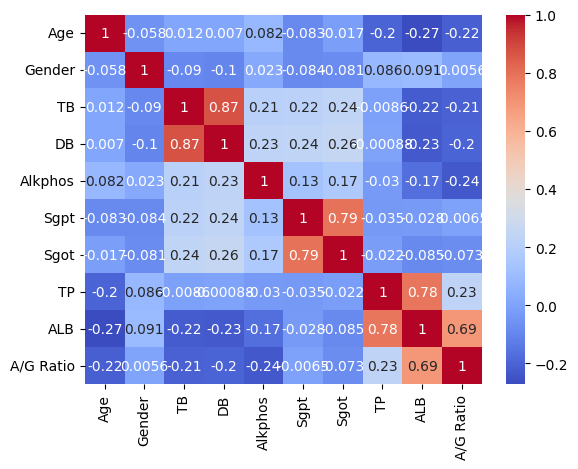

In [172]:
#ใช้ Heatmap แสดงความสัมพันธ์ระหว่างตัวแปร 'Age' กับ ข้อมูล ถ้ามีสีแดงเข้มแสดงว่าตัวแปรมีความสัมพันธ์เชิงบวกสูง และ สีฟ้าเข้มแสดงว่าตัวแปรมีความสัมพันธ์เชิงลบสูง
corr = data_drop.corr()
sb.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()